In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf

import koopman as kp

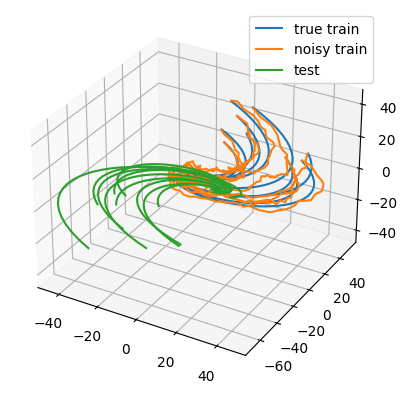

In [12]:
lds = kp.dynamics.LDS(A=[[-2, 0, 4], [4, 0, 4], [-4, -2, -4]])
true_train, noisy_train = lds.make_rand_trajs(0, 50, 5000, noise_var=1)
test = lds.make_rand_trajs(-50, 0, 1000, noise_var=0)
kp.utils.plot([true_train, noisy_train, test],
              target_dim=3,
              labels=["true train", "noisy train", "test"],
              max_lines=10)

In [13]:
net = kp.network.KoopmanNetwork(lds.dim)
net.train(noisy_train, autoencoder_epochs=100, autoencoder_batch_size=100, model_epochs=100, model_batch_size=100, filename="training.csv")

Epoch 1/100
50/50 [==============================] - 1s 6ms/step - loss: 469.0305
Epoch 2/100
50/50 [==============================] - 0s 6ms/step - loss: 260.1746
Epoch 3/100
50/50 [==============================] - 0s 6ms/step - loss: 137.1684
Epoch 4/100
50/50 [==============================] - 0s 7ms/step - loss: 107.6723
Epoch 5/100
50/50 [==============================] - 0s 7ms/step - loss: 65.4506
Epoch 6/100
50/50 [==============================] - 0s 7ms/step - loss: 24.6694
Epoch 7/100
50/50 [==============================] - 0s 7ms/step - loss: 17.9563
Epoch 8/100
50/50 [==============================] - 0s 6ms/step - loss: 12.4277
Epoch 9/100
50/50 [==============================] - 0s 6ms/step - loss: 8.5676
Epoch 10/100
50/50 [==============================] - 0s 7ms/step - loss: 6.7632
Epoch 11/100
50/50 [==============================] - 0s 5ms/step - loss: 5.8419
Epoch 12/100
50/50 [==============================] - 0s 6ms/step - loss: 5.2268
Epoch 13/100
50/50 [=====

32/32 [==============================] - 0s 6ms/step


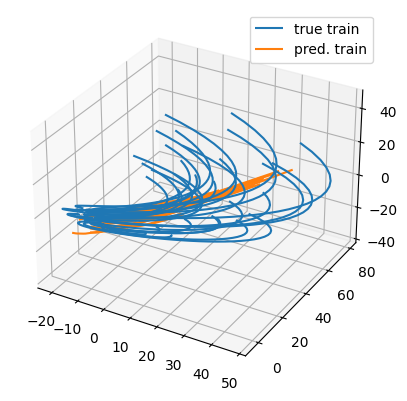

In [14]:
pred_train = net.predict(true_train[:, 0, :])
pred_test = net.predict(test[:, 0, :])
kp.utils.plot([true_train, pred_train], labels=["true train", "pred. train"])

In [ ]:
kp.utils.plot([test, pred_test], labels=["test", "pred. test"])